# Exploratory Data Analysis

## Read in Data and Examine

In [135]:
# Change to the data directory
import os
os.chdir('newyork_data') # You should change to the corresponding directory in your computer 
os.listdir()

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'newyork_data'

In [136]:
weather_data = pd.read_csv('newyork_data_test.csv')

In [137]:
weather_data.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [138]:
weather_data['windspeed'][weather_data['windspeed']>40]

34     43.9
215    42.0
268    47.9
332    41.5
427    40.2
485    50.3
882    42.5
883    40.7
905    46.4
906    40.7
976    45.6
Name: windspeed, dtype: float64

In [139]:
weather_data['precip'][weather_data['precip']>10]

0      13.809
21     12.386
42     31.034
71     25.979
91     15.917
120    13.092
148    11.387
177    13.662
199    12.924
230    10.145
266    22.104
332    10.753
338    17.887
416    45.544
417    17.631
427    71.639
449    14.632
450    14.046
523    10.865
549    18.463
565    26.429
577    15.831
583    11.903
604    10.969
700    17.013
701    11.954
761    11.675
797    20.025
803    11.125
804    27.566
816    25.831
822    12.931
824    10.527
825    43.738
826    12.238
834    12.922
863    22.652
867    10.346
879    17.180
882    10.084
885    11.882
888    18.496
889    11.217
897    12.674
898    20.424
905    27.998
932    20.571
936    14.190
938    20.680
939    11.815
976    11.493
985    10.958
Name: precip, dtype: float64

In [140]:
weather_data[['datetime', 'temp']]

,datetime,temp
0,2020-07-01,22.8
1,2020-07-02,26.4
2,2020-07-03,27.8
3,2020-07-04,24.7
4,2020-07-05,26.9
...,...,...
986,2023-03-14,2.1
987,2023-03-15,3.6
988,2023-03-16,7.5
989,2023-03-17,11.6


In [141]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import the data
weather_data = pd.read_csv('newyork_data_test.csv', parse_dates=['datetime'])

# Check the shape of the dataset
print(weather_data.shape)

# Select the datetime and the temperature columns
temp_df = weather_data[["datetime","temp"]]
temp_df.head(10)

(991, 33)


,datetime,temp
0,2020-07-01,22.8
1,2020-07-02,26.4
2,2020-07-03,27.8
3,2020-07-04,24.7
4,2020-07-05,26.9
5,2020-07-06,26.2
6,2020-07-07,25.0
7,2020-07-08,25.8
8,2020-07-09,26.8
9,2020-07-10,24.3


### Dataset Explanation

In [142]:
# Check the shape of the dataset
temp_df.shape

(991, 2)

Using the past temperature data as far as 2015 is not a good indicator for today's weather data as the temperature might have been influenced by other recent factors, including the rising of global warming. 

Thus, for analysis and forecasting, we only use a subset of data from 2016 to 2019 as it accounts for more recent factors.

In [143]:
# Select the subset data from 2016 to 2019
#mask = (temp_df['datetime'] >= '2016-01-01') & (temp_df['datetime'] <= '2019-05-21')
#temp_df = temp_df.loc[mask]

# Reset the index 
temp_df.set_index("datetime", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,temp
datetime,
2020-07-01,22.8
2020-07-02,26.4
2020-07-03,27.8
2020-07-04,24.7
2020-07-05,26.9


,temp
datetime,
2023-03-14,2.1
2023-03-15,3.6
2023-03-16,7.5
2023-03-17,11.6
2023-03-18,9.5


For simplicity, the T_mu column above shows the daily average temperatures in Helsinki for the first 5 days of January 2016 and last 5 days of May 2019 in Helsinki, Finland.

In order to get more information, Python Pandas library provides a 'describe' function to show the count, mean, standard deviation, min/ max value and the quantiles of our dataset:

In [144]:
temp_df.describe()

,temp
count,991.000000
mean,14.077699
std,9.264081
min,-11.600000
25%,6.150000
50%,14.100000
75%,22.650000
max,30.700000


In [145]:
# Output the maximum and minimum temperature date
print(temp_df.loc[temp_df["temp"] == temp_df["temp"].max()])
print(temp_df.loc[temp_df["temp"] == temp_df["temp"].min()])

            temp
datetime        
2022-07-24  30.7
2022-08-09  30.7
            temp
datetime        
2022-12-24 -11.6


**Observations:** 

* On 17 July 2018, Helsinki witnessed the hottest date in the 4-year period (2016–2019). The temperature was 26.1 degrees Celsius. In contrast, on 07 January 2016, Helsinki citizens saw the coldest date in the 4-year period, when the temperature dropped to as terribly low as -22.6 degrees Celsius.
* There was not a significant difference between the median and the mean, being approximately 5.8 and 6.6 degrees Celsius respectively.

### Data Visualization

Let’s explore this time series as a data visualization:

In [146]:
temp_df

,temp
datetime,
2020-07-01,22.8
2020-07-02,26.4
2020-07-03,27.8
2020-07-04,24.7
2020-07-05,26.9
...,...
2023-03-14,2.1
2023-03-15,3.6
2023-03-16,7.5


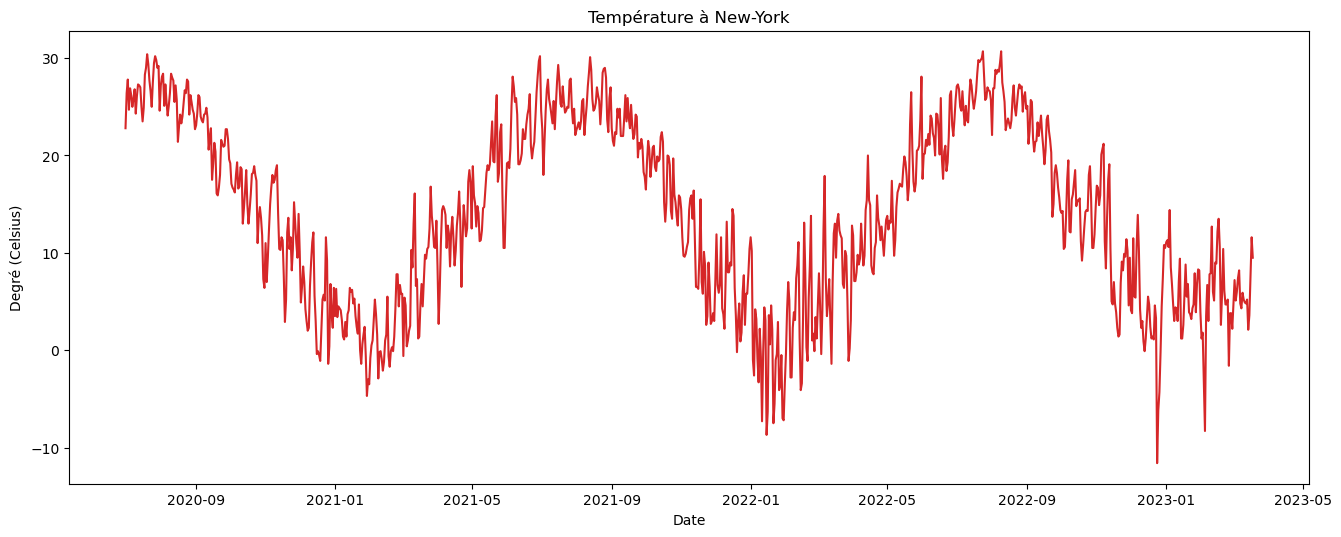

In [247]:
# Plot the daily temperature change 
plt.figure(figsize=(16,6), dpi=100)
plt.plot(temp_df.index, temp_df.temp, color='tab:red')
plt.gca().set(title="Température à New-York", xlabel='Date', ylabel="Degré (Celsius)")
plt.show()

However, the plot above is a bit noisy, because it contains all the daily temperatures. However, looking carefully into the data points, we could see that there is only a minor temperature change between the current date and the next date. 

**How could we plot the graph containing only longer-than-daily temperature change and thus looks neater?**

Here is the tool: 
The moving average is mostly used with time series data to capture the short-term fluctuations while focusing on longer trends.

<AxesSubplot:xlabel='datetime'>

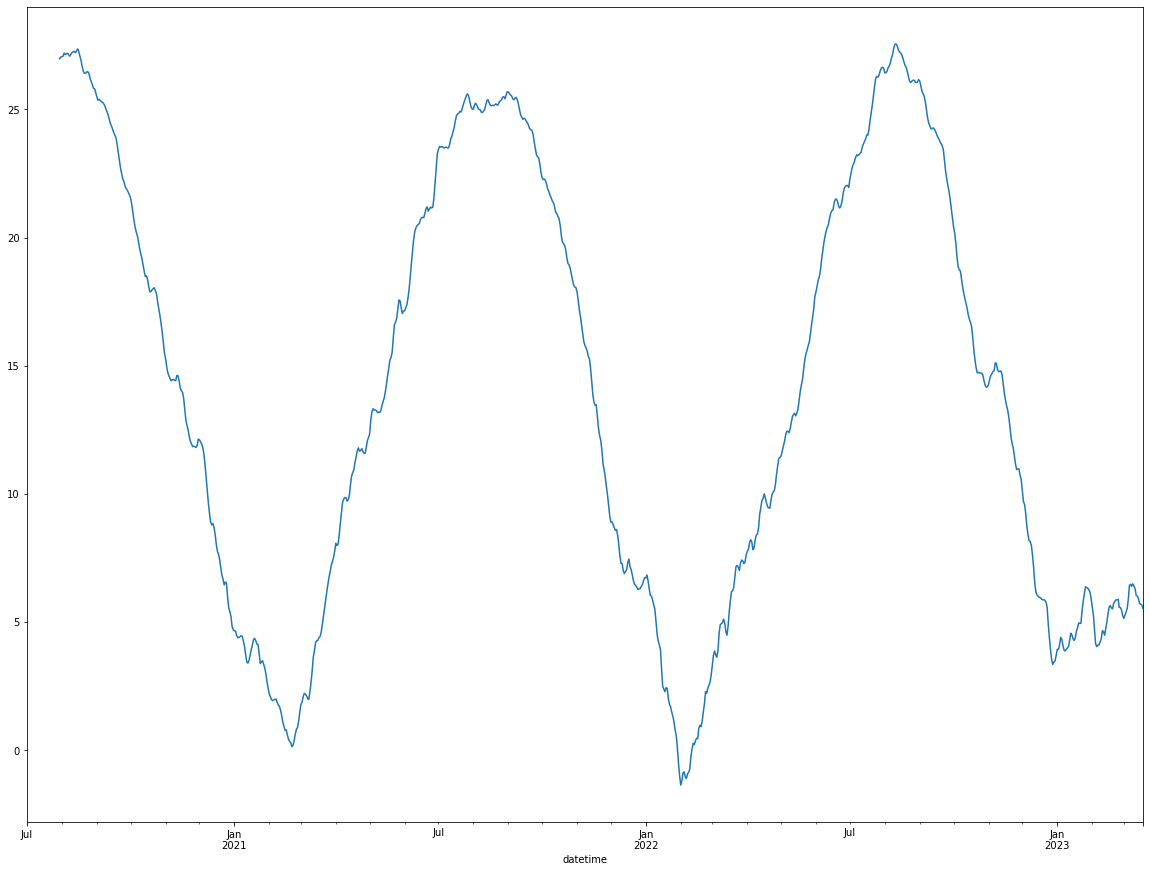

In [148]:
# Apply the Moving Average function by a subset of size 30 days.
temp_df_mean = temp_df.temp.rolling(window=30).mean()
temp_df_mean.plot(figsize=(20,15))


We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

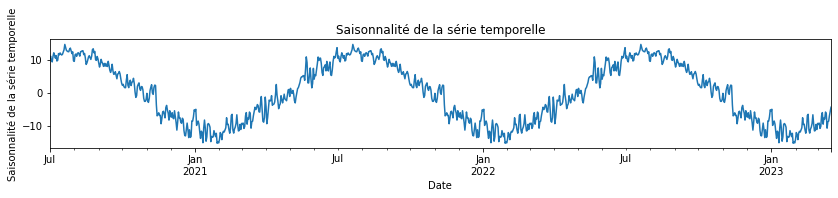

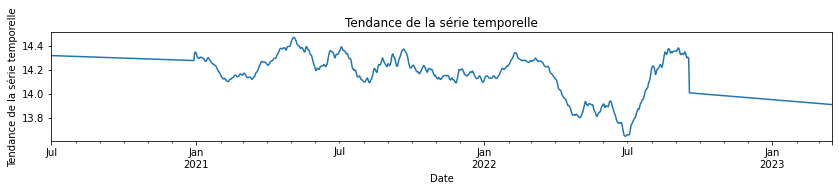

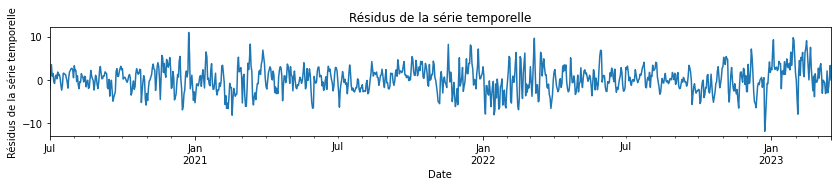

In [167]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(temp_df.temp, model='additive',extrapolate_trend='freq', period=365)

# Plot
#plt.rcParams.update({'figure.figsize': (10,10)})
#result_add.plot().suptitle('Additive Decomposition', fontsize=12)
#plt.show()



decomposition_seasonal=result_add.seasonal
ax= decomposition_seasonal.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Saisonnalité de la série temporelle')
ax.set_title('Saisonnalité de la série temporelle')
plt.show()

decomposition_trend=result_add.trend
ax= decomposition_trend.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Tendance de la série temporelle')
ax.set_title('Tendance de la série temporelle')
plt.show()

decomposition_residual=result_add.resid
ax= decomposition_residual.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Résidus de la série temporelle')
ax.set_title('Résidus de la série temporelle')
plt.show()

 The plot above clearly shows that the temperature is unstable, along with its obvious seasonality.

## Baseline Model

Since the change of temperature is not significant between 2 days, it is reasonable to produce a most basic model in which it uses the current temperature as a prediction for the next day.

**Thus, we would predict the weather based on an assumption:** The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.

Here, I use 1-step prediction to model the temperature as a time series:

In [168]:
# Shift the current temperature to the next day. 
predicted_df = temp_df["temp"].to_frame().shift(1).rename(columns = {"temp": "temp_pred" })
actual_df = temp_df["temp"].to_frame().rename(columns = {"temp": "temp_actual" })

# Concatenate the actual and predicted temperature
one_step_df = pd.concat([actual_df,predicted_df],axis=1)

# Select from the second row, because there is no prediction for today due to shifting.
one_step_df = one_step_df[1:]
one_step_df.head(10)

,temp_actual,temp_pred
datetime,,
2020-07-02,26.4,22.8
2020-07-03,27.8,26.4
2020-07-04,24.7,27.8
2020-07-05,26.9,24.7
2020-07-06,26.2,26.9
2020-07-07,25.0,26.2
2020-07-08,25.8,25.0
2020-07-09,26.8,25.8
2020-07-10,24.3,26.8


We could validate how well our model is by looking at the Root Mean Squared Error(RMSE) between the predicted and actual temperature:

In [169]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

# Calculate the RMSE
temp_pred_err = MSE(one_step_df.temp_actual, one_step_df.temp_pred, squared=False)
print("The RMSE is",temp_pred_err)

The RMSE is 3.080769613934384


Another widely-used technique for time series prediction is SARIMA Model. I would like to see if it is possible to lower the prediction error (although it is already really small and totally okay to use it with small tolerance).

# Weather Forecast using SARIMA model

## Parameter Selection 

### Grid Search

We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average.
SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend, and noise in data:

We will use a “grid search” to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMAX() function from the statsmodels module and assess its overall quality.

In [170]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


The AIC measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value.

In [171]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(one_step_df.temp_actual,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8392.922667826746
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7433.327982197974
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6023.959648664
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5849.46592759735
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5991.111671650979
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5885.36799358353
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5831.274241630347
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5827.926825615607
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7219.901160275471
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6496.369833066288
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5537.129149071734
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5296.68634993236
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5495.922893486368
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5497.872110384029
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5298.193399614844
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5280.605439592791
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5029.605031045462
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4977.52445673606

The output of our code suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 yields the lowest AIC value of 5329.98. We should therefore consider this to be optimal option out of all the models we have considered.

## Fitting the Model

In [172]:
# Import the statsmodels library for using SARIMAX model
import statsmodels.api as sm

# Fit the SARIMAX model using optimal parameters
mod = sm.tsa.statespace.SARIMAX(one_step_df.temp_actual,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

## Model Diagnostics

The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior:

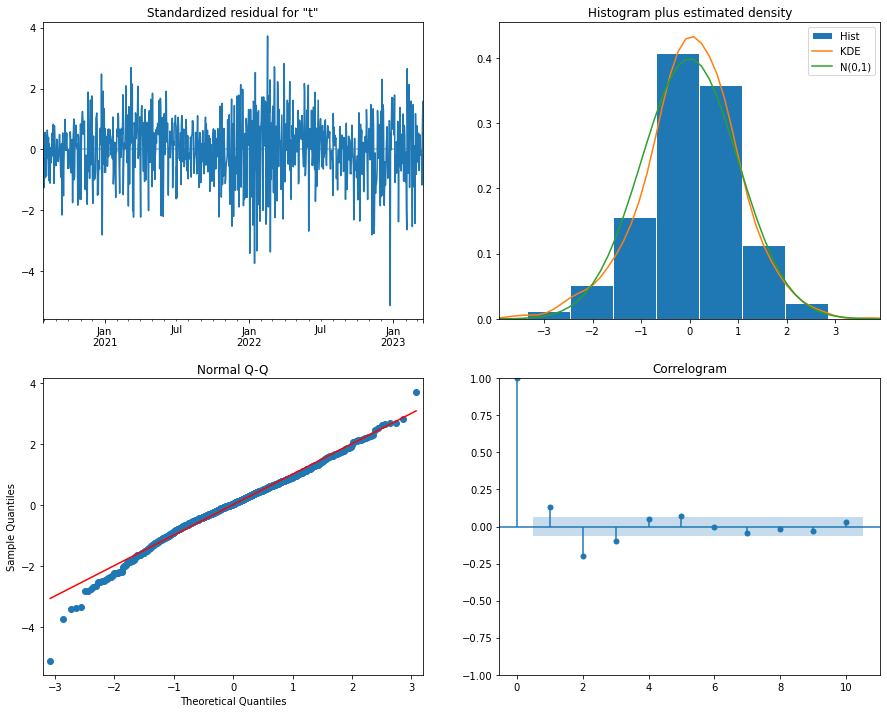

In [173]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
* The residuals over time (top left plot) do not display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

## Validating the Non-Dynamic Forecast

The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

In [174]:
pred = results.get_prediction(dynamic=False)
pred_ci = pred.conf_int()

The dynamic=False argument ensures that we produce one-step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

We can plot the real and forecasted values of the average daily temperature to assess how well we did. Notice how we zoomed in on the end of the time series by slicing the date index.

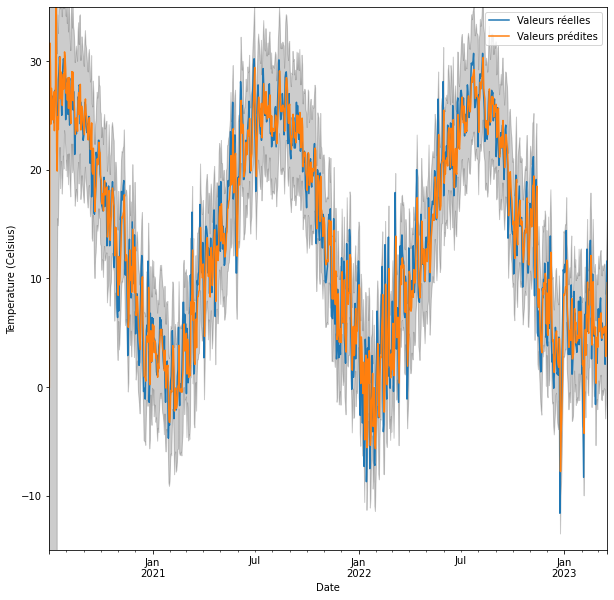

In [176]:
ax = one_step_df.temp_actual.plot(label='Valeurs réelles')
pred.predicted_mean.plot(ax=ax, label='Valeurs prédites')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Celsius)')
plt.ylim([-15,35])
plt.legend()
plt.show()

Overall, our forecasts align with the true values very well, showing a seasonal cycle of length 365 days.

### Forecast Diagnostic

It is also useful to quantify the accuracy of our forecasts. We will use the MSE (Mean Squared Error), in which  for each predicted value, we compute its distance to the true value and square the result.

In [181]:
y_forecasted = pred.predicted_mean
y_truth = one_step_df.temp_actual['2020-07-01':]
print(y_forecasted.shape)
print(y_truth.shape)
# Compute the mean square error
mse = MSE(y_truth, y_forecasted, squared=True)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

(990,)
(990,)
The Mean Squared Error of our forecasts is 9.7


## Validating the Dynamic Forecast

In [182]:
pred_dynamic = results.get_prediction( dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

Once again, we plot the real and forecasted values of the average daily temperature to assess how well we did:

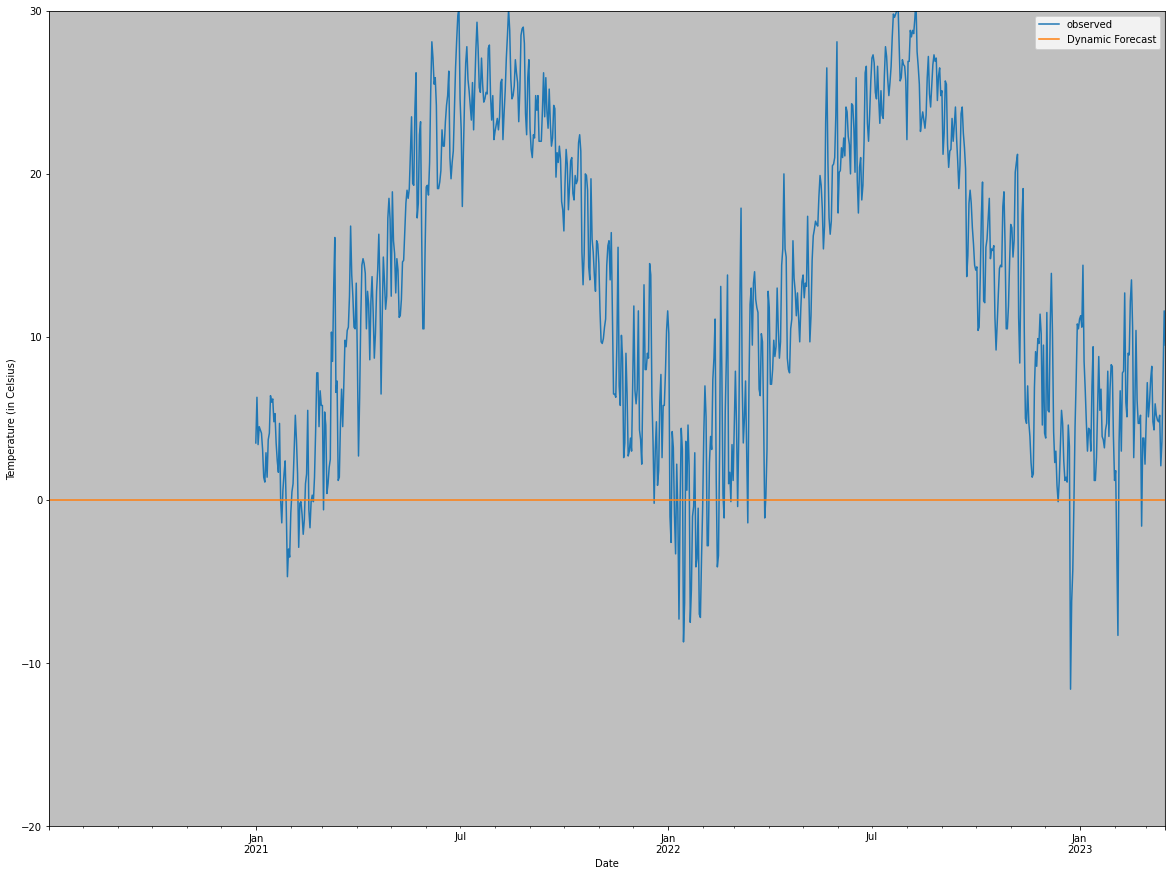

In [183]:
ax = one_step_df.temp_actual['2021':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)


ax.set_xlabel('Date')
ax.set_ylabel('Temperature (in Celsius)')
plt.ylim([-20,30])
plt.legend()
plt.show()



In this case, the model seems to predict the temperature inaccurately, with major fluctuations between the true value and the predicted value.

### Forecast Diagnostic

Once again, we measure the goodness of our model using RMSE:

In [47]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = one_step_df.temp_actual['2017-05-19':]

# Compute the mean square error
mse = sqrt(MSE(y_truth, y_forecasted).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 16.84


# Conclusion

In this tutorial, we described how to implement a seasonal SARIMA model in Python. We made extensive use of the pandas and statsmodels libraries and showed how to run model diagnostics, as well as how to produce forecasts of the temperature.

Recall that in the assumption we made in the section 2.2 Baseline Model, we could even reinforce our assumption and continue our belief that the air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on. 

It is the best so far to use the history up to the point that we would like to make predictions on. Especially it holds for weather forecasting, where the temperature today does not change much from yesterday, and the transition to another season signaling through the temperature should gradually occur, unless there is any disastrous factors such as storm, drought, etc.

## Garch

In [184]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
ticker= "aapl"
tsla_data = yf.download(ticker, start="2020-01-01", end="2023-10-14")

[*********************100%***********************]  1 of 1 completed


In [237]:
tsla_data['Return'] = 100 * (tsla_data['Close'].pct_change())

In [238]:
tsla_data

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449387,135480400,2.281632
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800,-0.972204
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314903,118387200,0.796825
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970085,108872000,-0.470305
...,...,...,...,...,...,...,...
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700,1.564421
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,0.770166
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,-0.324964


"\nfig,ax = plt.subplots(figsize=(8,4))\nax.spines[['top','right']].set_visible(False)\nplt.plot(temp_df.temp, label = 'Daily Temp')\nplt.legend(loc='upper right')\nplt.title('Daily Temperature Over Time in New York')\n"

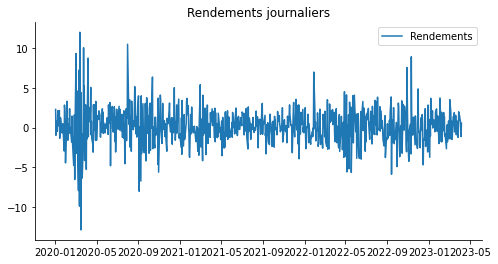

In [239]:
tsla_data.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(tsla_data['Return'], label = 'Rendements')
plt.legend(loc='upper right')
plt.title('Rendements journaliers')


'''
fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(temp_df.temp, label = 'Daily Temp')
plt.legend(loc='upper right')
plt.title('Daily Temperature Over Time in New York')
'''

In [240]:
pip install tabulate

In [241]:
daily_volatility = tsla_data['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

from tabulate import tabulate

print(tabulate([['Apple',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Volatilité quotidienne %', 'Volatilité mensuelle %', 'Volatilité annuelle %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

"""
daily_volatility = temp_df.temp.std()

monthly_volatility = math.sqrt(30) * daily_volatility

annual_volatility = math.sqrt(365) * daily_volatility

from tabulate import tabulate

print(tabulate([['New York Temperature',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))
"""


╒═══════╤════════════════════════════╤══════════════════════════╤═════════════════════════╕
│       │  Volatilité quotidienne %  │  Volatilité mensuelle %  │  Volatilité annuelle %  │
╞═══════╪════════════════════════════╪══════════════════════════╪═════════════════════════╡
│ Apple │            2.27            │          10.41           │          36.06          │
╘═══════╧════════════════════════════╧══════════════════════════╧═════════════════════════╛


'\ndaily_volatility = temp_df.temp.std()\n\nmonthly_volatility = math.sqrt(30) * daily_volatility\n\nannual_volatility = math.sqrt(365) * daily_volatility\n\nfrom tabulate import tabulate\n\nprint(tabulate([[\'New York Temperature\',daily_volatility,monthly_volatility,annual_volatility]],headers = [\'Daily Volatility %\', \'Monthly Volatility %\', \'Annual Volatility %\'],tablefmt = \'fancy_grid\',stralign=\'center\',numalign=\'center\',floatfmt=".2f"))\n'

In [242]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(tsla_data['Return'], p = 1, q = 1,
                   mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])
'''
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(temp_df.temp, p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])
'''

mu          0.204237
omega       0.208966
alpha[1]    0.118414
beta[1]     0.840111
Name: params, dtype: float64


                 h.1       h.2       h.3      h.4       h.5
Date                                                       
2023-04-06  2.076471  2.199315  2.317064  2.42993  2.538114


"\nfrom arch import arch_model\nfrom arch.__future__ import reindexing\n\ngarch_model = arch_model(temp_df.temp, p = 1, q = 1,\n                      mean = 'constant', vol = 'GARCH', dist = 'normal')\n\ngm_result = garch_model.fit(disp='off')\nprint(gm_result.params)\n\nprint('\n')\n\ngm_forecast = gm_result.forecast(horizon = 5)\nprint(gm_forecast.variance[-1:])\n"

"\nrolling_predictions = []\ntest_size = 365\n\nfor i in range(test_size):\n    train = temp_df.temp[:-(test_size-i)]\n    model = arch_model(train, p=1, q=1)\n    model_fit = model.fit(disp='off')\n    pred = model_fit.forecast(horizon=70)\n    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))\n    \nrolling_predictions = pd.Series(rolling_predictions, index=temp_df.temp.index[-365:])\n\nfig,ax = plt.subplots(figsize=(10,4))\nax.spines[['top','right']].set_visible(False)\nplt.plot(rolling_predictions)\nplt.title('Rolling Prediction')"

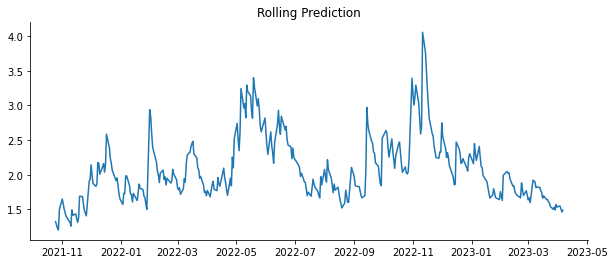

In [243]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = tsla_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=tsla_data['Return'].index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
'''
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = temp_df.temp[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=70)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=temp_df.temp.index[-365:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')'''

'\nfig,ax = plt.subplots(figsize=(13,4))\nax.grid(which="major", axis=\'y\', color=\'#758D99\', alpha=0.3, zorder=1)\nax.spines[[\'top\',\'right\']].set_visible(False)\nplt.plot(temp_df.temp[-465:])\nplt.plot(rolling_predictions)\nplt.title(\'New York Temp - Rolling Forecast\')\nplt.legend([\'True Daily Temperature\', \'Predicted Temperature Volatility\'])'

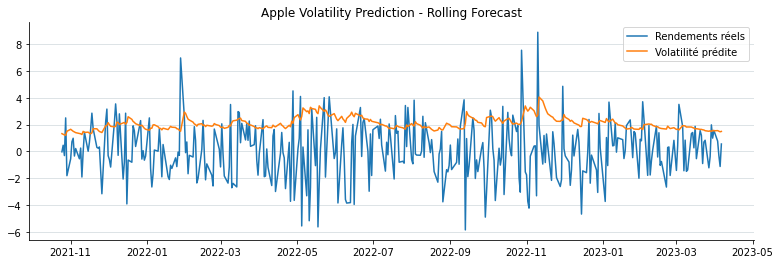

In [246]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(tsla_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Apple Volatility Prediction - Rolling Forecast')
plt.legend(['Rendements réels', 'Volatilité prédite'])
'''
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(temp_df.temp[-465:])
plt.plot(rolling_predictions)
plt.title('New York Temp - Rolling Forecast')
plt.legend(['True Daily Temperature', 'Predicted Temperature Volatility'])'''